# Inferencia causal en modelos bayesianos: Exploración y aplicación del deconfounder en análisis de datos observacionales

Leila Sofía Asplanato - ICIFI, ICAS, ECyT, UNSAM (Bs. As.)

--------------------------------------------------
--------------------------------------------------

# Sección preliminar

Códigos de las estructuras confundidoras de las diapositivas (y casos discretos).

## Bifurcación (Fork)

### Variables discretas

In [ ]:
import numpy as np
import pandas as pd

# Semilla, por reproducibilidad
np.random.seed(123)

# Número de muestras
n = 1000

# Generamos Z, "causa" común
z = np.random.binomial(1, 0.5, size = n) # # intentos, probabilidad, # experimentos

# Generamos X e Y en función de Z
x = np.random.binomial(1, (1 - z) * 0.1 + z * 0.9)
y = np.random.binomial(1, (1 - z) * 0.1 + z * 0.9)

# Dataframe para usar tabla de contingencia
data = pd.DataFrame({'X': x, 'Y': y, 'Z':z})
contingency_table = pd.crosstab(data['X'], data['Y'])
print("Tabla de contingencia X vs Y:")
print(contingency_table)

# Correlación entre X e Y
correlation = np.corrcoef(data['X'], data['Y'])[0, 1]
print(f"Correlación entre X e Y: \n {correlation}")


# Condicionamos en los valores de Z
## Z = 0
data_Z0 = data[data['Z'] == 0]
contingency_table_Z0 = pd.crosstab(data_Z0['X'], data_Z0['Y'])
print("Contingency table of X vs Y when Z = 0:")
print(contingency_table_Z0)
print(f"Correlación entre X e Y: \n Z = 0 \n {np.corrcoef(data_Z0['X'], data_Z0['Y'])[0, 1]}")

## Z = 1
data_Z1 = data[data['Z'] == 1]
contingency_table_Z1 = pd.crosstab(data_Z1['X'], data_Z1['Y'])
print("Contingency table of X vs Y when Z = 1:")
print(contingency_table_Z1)
print(f"Correlación entre X e Y: \n Z = 1 \n {np.corrcoef(data_Z1['X'], data_Z1['Y'])[0, 1]}")

Tabla de contingencia X vs Y:
Y    0    1
X          
0  418   80
1   96  406
Correlación entre X e Y: 
 0.6483713963808088
Contingency table of X vs Y when Z = 0:
Y    0   1
X         
0  416  34
1   53   5
Correlación entre X e Y: 
 Z = 0 
 0.012723477243194883
Contingency table of X vs Y when Z = 1:
Y   0    1
X         
0   2   46
1  43  401
Correlación entre X e Y: 
 Z = 1 
 -0.056798281987953676


### Variables continuas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

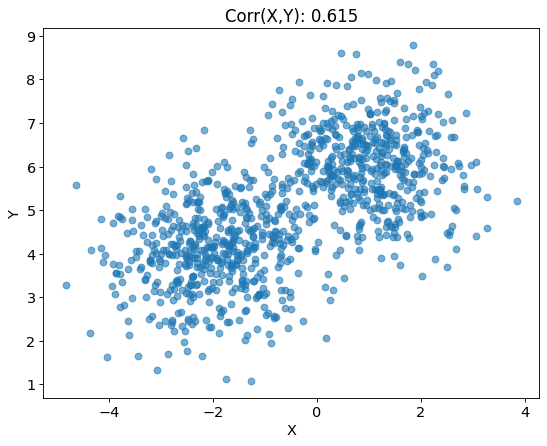

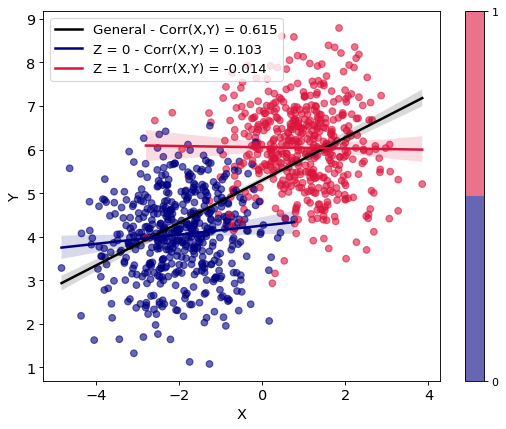

In [ ]:
# Semilla, por reproducibilidad
np.random.seed(123)

# Número de muestras
n = 1000

# Generamos Z, "causa" común
z = np.random.binomial(1, 0.5, size = n) # # intentos, probabilidad, # experimentos

# Generamos X e Y en función de Z
x = np.random.normal(3*z - 2)
y = np.random.normal(2*z +4)

# Dataframe para usar tabla de contingencia
data = pd.DataFrame({'X': x, 'Y': y, 'Z':z})
corr_general = np.corrcoef(data['X'], data['Y'])[0, 1].round(3)
corr_Z0 = np.corrcoef(data[data['Z'] == 0]['X'], data[data['Z'] == 0]['Y'])[0, 1].round(3)
corr_Z1 = np.corrcoef(data[data['Z'] == 1]['X'], data[data['Z'] == 1]['Y'])[0, 1].round(3)


cmap = mpl.colors.ListedColormap(["navy", "crimson"])
plt.figure(figsize=(8, 6), dpi=80)
sc = plt.scatter(data['X'], data['Y'], alpha=0.6)
plt.title(f"Corr(X,Y): {corr_general}", size = 15)
plt.xlabel('X', size = 13)
plt.ylabel('Y', size = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Scatter plot entre X e Y
plt.figure(figsize=(8, 6), dpi=80)
sc = plt.scatter(data['X'], data['Y'], c=data['Z'], cmap=cmap, alpha=0.6)
plt.xlabel('X', size = 13)
plt.ylabel('Y', size = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar(sc, ticks=np.linspace(0,2,3))

# Agregamos líneas de regresión: generales, para Z= 0,1
sns.regplot(x='X', y='Y', data=data, scatter=False, color='black', label=f'General - Corr(X,Y) = {corr_general}')
##Z = 0
sns.regplot(x='X', y='Y', data=data[data['Z'] == 0], scatter=False, color=cmap.colors[0],
            label=f'Z = 0 - Corr(X,Y) = {corr_Z0}')

## Z = 1
sns.regplot(x='X', y='Y', data=data[data['Z'] == 1], scatter=False, color=cmap.colors[1],
            label= f'Z = 1 - Corr(X,Y) = {corr_Z1}')

plt.legend(prop={'size': 12})
plt.show()

## Tubería (Pipe)

### Variables Discretas


In [ ]:
import numpy as np
import pandas as pd

# Semilla, por reproducibilidad
np.random.seed(123)

# Número de muestras
n = 1000

# Generamos ___
x = np.random.binomial(1, 0.5, size = n) #
z = ...
y = ...

### Variables Continuas

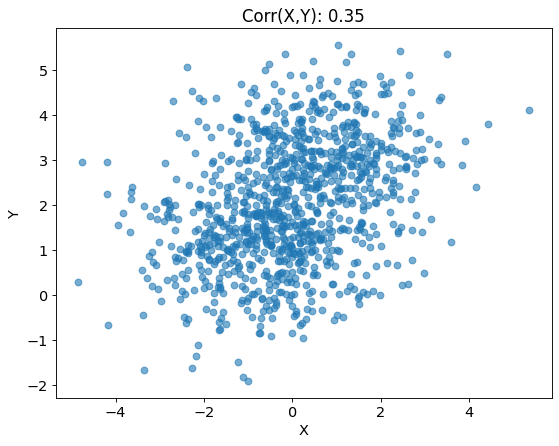

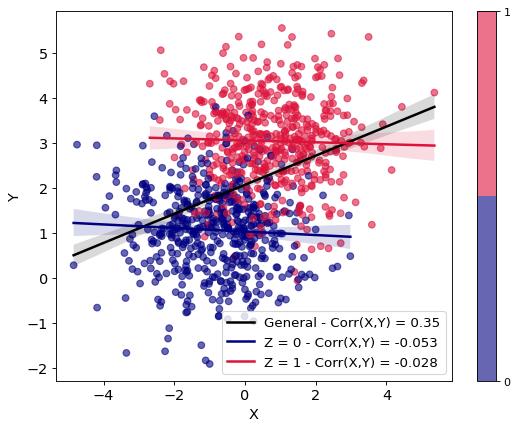

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# Semilla, por reproducibilidad
np.random.seed(123)

# Número de muestras
n = 1000

# Generamos Z, "causa" común
x = np.random.normal(loc = 0,scale = 1.5,size = n)

def inv_logit(p):  #Para pasar de X continuo a 0,1
    return np.exp(p) / (1 + np.exp(p))

# Generamos X e Y en función de Z
z = np.random.binomial(1,inv_logit(x), size = n)
y = np.random.normal(loc =2*z +1)

# Dataframe para usar tabla de contingencia
data = pd.DataFrame({'X': x, 'Y': y, 'Z':z})
corr_general = np.corrcoef(data['X'], data['Y'])[0, 1].round(3)
corr_Z0 = np.corrcoef(data[data['Z'] == 0]['X'], data[data['Z'] == 0]['Y'])[0, 1].round(3)
corr_Z1 = np.corrcoef(data[data['Z'] == 1]['X'], data[data['Z'] == 1]['Y'])[0, 1].round(3)


cmap = mpl.colors.ListedColormap(["navy", "crimson"])
plt.figure(figsize=(8, 6), dpi=80)
sc = plt.scatter(data['X'], data['Y'], alpha=0.6)
plt.title(f"Corr(X,Y): {np.corrcoef(data['X'], data['Y'])[0, 1].round(3)}", size = 15)
plt.xlabel('X', size = 13)
plt.ylabel('Y', size = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Scatter plot entre X e Y
plt.figure(figsize=(8, 6), dpi=80)
sc = plt.scatter(data['X'], data['Y'], c=data['Z'], cmap=cmap, alpha=0.6)
plt.xlabel('X', size = 13)
plt.ylabel('Y', size = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar(sc, ticks=np.linspace(0,2,3))

# Agregamos líneas de regresión: generales, para Z= 0,1
sns.regplot(x='X', y='Y', data=data, scatter=False, color='black', label=f'General - Corr(X,Y) = {corr_general}')
##Z = 0
sns.regplot(x='X', y='Y', data=data[data['Z'] == 0], scatter=False, color=cmap.colors[0],
            label=f'Z = 0 - Corr(X,Y) = {corr_Z0}')

## Z = 1
sns.regplot(x='X', y='Y', data=data[data['Z'] == 1], scatter=False, color=cmap.colors[1],
            label= f'Z = 1 - Corr(X,Y) = {corr_Z1}')

plt.legend(prop={'size': 12})
plt.show()

## Colisionadora (Collider)

### Variable Discreta

In [ ]:
import numpy as np
import pandas as pd

# Semilla, por reproducibilidad
np.random.seed(123)

# Número de muestras
n = 1000

# Generamos variables independientes
x = np.random.binomial(1, 0.5, size = n) # # intentos, probabilidad, # experimentos
y = np.random.binomial(1, 0.5, size = n)
z = np.random.binomial(1, [0.9 if i+j > 0 else 0.1 for i,j in zip(x,y)])

# Dataframe para usar tabla de contingencia
data = pd.DataFrame({'X': x, 'Y': y, 'Z':z})
contingency_table = pd.crosstab(data['X'], data['Y'])
print("Tabla de contingencia X vs Y:")
print(contingency_table)

# Correlación entre X e Y
correlation = np.corrcoef(data['X'], data['Y'])[0, 1]
print(f"Correlación entre X e Y: \n {correlation}")


# Condicionamos en los valores de Z
## Z = 0
data_Z0 = data[data['Z'] == 0]
contingency_table_Z0 = pd.crosstab(data_Z0['X'], data_Z0['Y'])
print("Contingency table of X vs Y when Z = 0:")
print(contingency_table_Z0)
print(f"Correlación entre X e Y: \n Z = 0 \n {np.corrcoef(data_Z0['X'], data_Z0['Y'])[0, 1]}")

## Z = 1
data_Z1 = data[data['Z'] == 1]
contingency_table_Z1 = pd.crosstab(data_Z1['X'], data_Z1['Y'])
print("Contingency table of X vs Y when Z = 1:")
print(contingency_table_Z1)
print(f"Correlación entre X e Y: \n Z = 1 \n {np.corrcoef(data_Z1['X'], data_Z1['Y'])[0, 1]}")

Tabla de contingencia X vs Y:
Y    0    1
X          
0  240  268
1  258  234
Correlación entre X e Y: 
 -0.05194306463083071
Contingency table of X vs Y when Z = 0:
Y    0   1
X         
0  222  21
1   23  22
Correlación entre X e Y: 
 Z = 0 
 0.4100385649459321
Contingency table of X vs Y when Z = 1:
Y    0    1
X          
0   18  247
1  235  212
Correlación entre X e Y: 
 Z = 1 
 -0.4623685586168138


### Variables Continuas

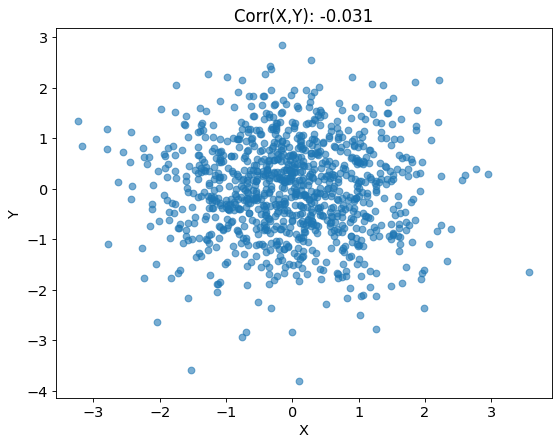

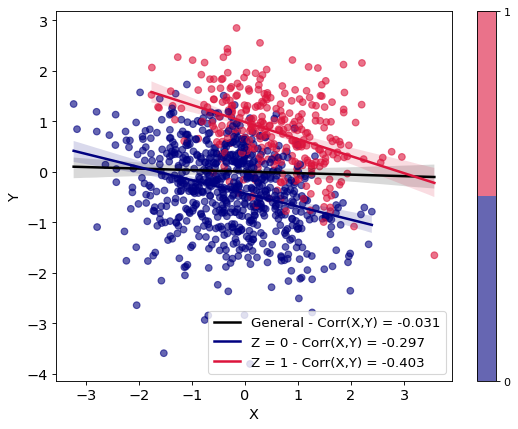

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# Semilla, por reproducibilidad
np.random.seed(123)

# Número de muestras
n = 1000

# Generamos variables independientes
x = np.random.normal(size = n)
y = np.random.normal(size = n)

def inv_logit(p):  #Para pasar de X continuo a 0,1
    return np.exp(p) / (1 + np.exp(p))

# Generamos X e Y en función de Z
z = np.random.binomial(1,inv_logit(2*x+3*y-2), size = n)


# Dataframe para usar tabla de contingencia
data = pd.DataFrame({'X': x, 'Y': y, 'Z':z})
corr_general = np.corrcoef(data['X'], data['Y'])[0, 1].round(3)
corr_Z0 = np.corrcoef(data[data['Z'] == 0]['X'], data[data['Z'] == 0]['Y'])[0, 1].round(3)
corr_Z1 = np.corrcoef(data[data['Z'] == 1]['X'], data[data['Z'] == 1]['Y'])[0, 1].round(3)


cmap = mpl.colors.ListedColormap(["navy", "crimson"])
plt.figure(figsize=(8, 6), dpi=80)
sc = plt.scatter(data['X'], data['Y'], alpha=0.6)
plt.title(f"Corr(X,Y): {np.corrcoef(data['X'], data['Y'])[0, 1].round(3)}", size = 15)
plt.xlabel('X', size = 13)
plt.ylabel('Y', size = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Scatter plot entre X e Y
plt.figure(figsize=(8, 6), dpi=80)
sc = plt.scatter(data['X'], data['Y'], c=data['Z'], cmap=cmap, alpha=0.6)
plt.xlabel('X', size = 13)
plt.ylabel('Y', size = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar(sc, ticks=np.linspace(0,2,3))

# Agregamos líneas de regresión: generales, para Z= 0,1
sns.regplot(x='X', y='Y', data=data, scatter=False, color='black', label=f'General - Corr(X,Y) = {corr_general}')
##Z = 0
sns.regplot(x='X', y='Y', data=data[data['Z'] == 0], scatter=False, color=cmap.colors[0],
            label=f'Z = 0 - Corr(X,Y) = {corr_Z0}')

## Z = 1
sns.regplot(x='X', y='Y', data=data[data['Z'] == 1], scatter=False, color=cmap.colors[1],
            label= f'Z = 1 - Corr(X,Y) = {corr_Z1}')

plt.legend(prop={'size': 12})
plt.show()

## Inferencia Bayesiana con PyMC

Running on PyMC v5.10.4


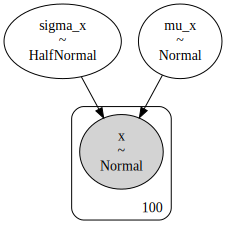

In [ ]:
# Instanciamos librerías
import numpy as np
import matplotlib.pyplot as plt


import pymc as pm
import arviz as az

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image
print(f"Running on PyMC v{pm.__version__}")

# Generación de datos
N, mu_true, sigma_true = 100, 5, 1
x_true = np.random.normal(mu_true, sigma_true,N)

# Instanciamos el modelo de estos datos (presentación)
with pm.Model() as modelo_simple:
    mu_x = pm.Normal('mu_x',mu = 0, sigma = 10)
    sigma_x = pm.HalfNormal("sigma_x", 3)
    x = pm.Normal("x", mu = mu_x, sigma = sigma_x, observed=x_true)

# Visualización del modelo (DAG)
pm.model_graph.model_to_graphviz(model=modelo_simple)

In [ ]:
# Corremos inferencia
data_sample = pm.sample(model = modelo_simple)
data_sample  #ver la estructura del objeto de inferencia

Vemos los resultados:
* ¿qué valores medios y desviaciones reportan?
* ¿cómo se ven las trazas?

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_x,4.827,0.093,4.651,5.001,0.002,0.001,2066.0,1370.0,1.0
sigma_x,0.934,0.066,0.818,1.066,0.001,0.001,2098.0,1158.0,1.0


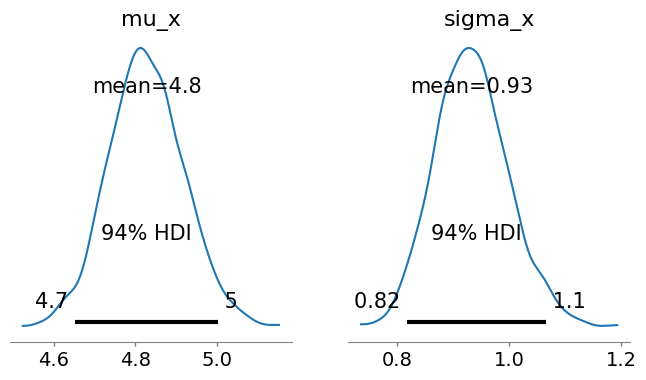

In [ ]:
# pm.plot_trace(data_sample)
az.summary(data_sample)
_ = az.plot_posterior(data_sample, figsize = (8,4))


# Taller Práctico - 1era parte

Importamos las librerías necesarias.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

import pymc as pm
import pymc.sampling_jax
import arviz as az
import graphviz

import gc
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.10.4


# Variables confundidoras


## Fork/Bifurcación

*Ejemplos sacados de McElreath, Statistical Rethinking (cap 5 o 6 - según edición).*

En el libro encuentran las otras estructuras confundidoras, en R.

Primero comenzamos visualizando datos reales de los estados de USA respecto de las tasas de casamiento, divorcio y edad mediana al casarse.

In [ ]:
# en google drive, tienen que cargar el documento en la carpeta!
# Si lo están corriendo localmente, poner el path correcto
path = "aca_su_ruta_de_archivo_local"
df = pd.read_csv(path + "WaffleDivorce.csv", delimiter = ";").iloc[:,:-3] #no vamos a usar los datos de esclavitud en esos estados
df.head()
df.info()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           50 non-null     object 
 1   Loc                50 non-null     object 
 2   Population         50 non-null     float64
 3   MedianAgeMarriage  50 non-null     float64
 4   Marriage           50 non-null     float64
 5   Marriage SE        50 non-null     float64
 6   Divorce            50 non-null     float64
 7   Divorce SE         50 non-null     float64
 8   WaffleHouses       50 non-null     int64  
 9   South              50 non-null     int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 4.0+ KB


Buscamos ver las asociaciones entre las variables de interés.
Para eso, ploteamos (con seaborn, podría haber sido de otra forma) los scatter plots entre estas variables.

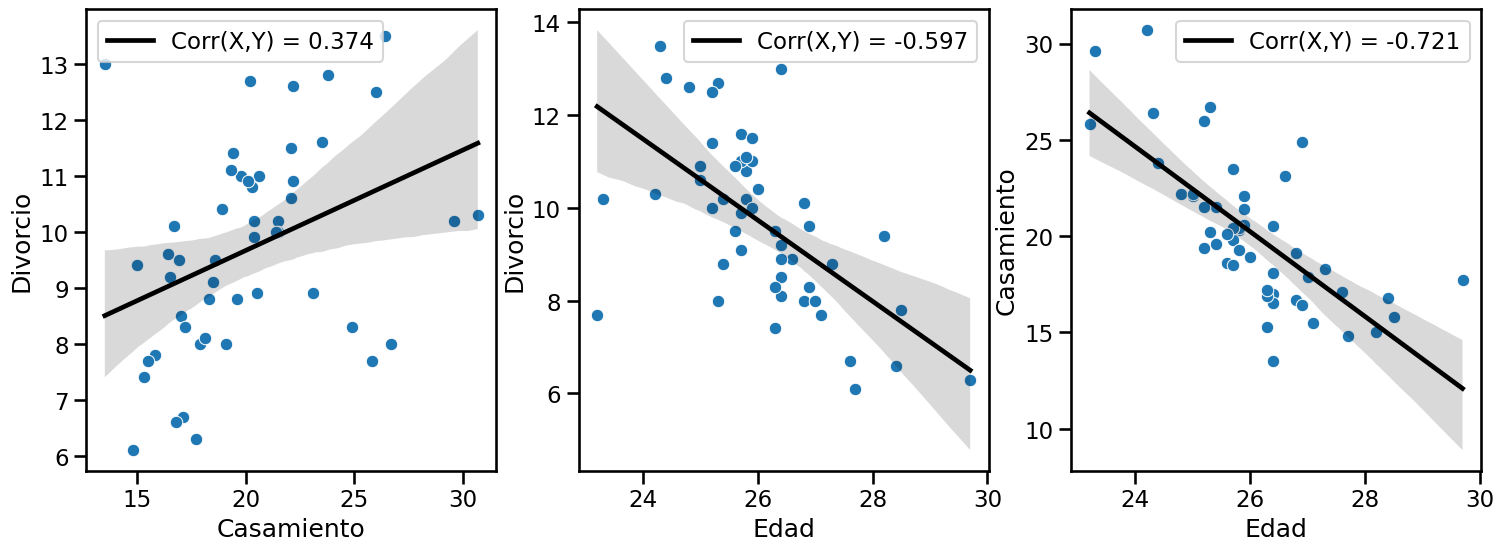

In [ ]:
sns.set_context("talk", font_scale=1)

# Creamos figura para los 3 scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
_ = sns.scatterplot(x="Marriage", y="Divorce", data=df, ax=axs[0])
_ = sns.scatterplot(x="MedianAgeMarriage", y="Divorce", data=df, ax=axs[1])
_ = sns.scatterplot(x="MedianAgeMarriage", y = "Marriage", data=df, ax=axs[2])

# Sumamos regresión y coeficientes de correlación
variable_pairs = [("Marriage", "Divorce"), ("MedianAgeMarriage", "Divorce"), ("MedianAgeMarriage", "Marriage")]

for i, (x_var, y_var) in enumerate(variable_pairs):
    corrcoef = np.corrcoef(df[x_var], df[y_var])[0, 1].round(3)
    _ = sns.regplot(x=x_var, y=y_var, data=df, scatter=False, ax=axs[i], color='black',
                label=f'Corr(X,Y) = {corrcoef}')
    _ = axs[i].legend()

# Nombres a las variables
_ = axs[0].set_xlabel("Casamiento")
_ = axs[0].set_ylabel("Divorcio")
_ = axs[1].set_xlabel("Edad")
_ = axs[1].set_ylabel("Divorcio")
_ = axs[2].set_xlabel("Edad")
_ = axs[2].set_ylabel("Casamiento")

# Si quisiéramos hacer modelados de los datos reales, primero tenemos que estandarizarlos.
# # Estandarizamos las variables
# def standardize(series):
#     std_series = (series - series.mean()) / series.std()
#     return std_series

# df["Divorce_std"] = standardize(df["Divorce"])
# df["Marriage_std"] = standardize(df["Marriage"])
# df["MedianAgeMarriage_std"] = standardize(df["MedianAgeMarriage"])

Encontramos que hay correlación entre tasa de divorcio y de casamiento. ¿Puede ser que haya asociación causal?

OJO! porque a priori no sabemos qué relación hay a partir de los gŕaficos, eso lo sabemos por los datos. Estos 3 gráficos de dispersión podrían ser de variables x, y, z y sin saber NADA del problema es difícil marcar una relación causal.


Casamiento --> Divorcio \\
Edad de casamiento --> Divorcio

A fin de cuentas, hay que casarse para divorciarse, por lo que a mayor tasa de casamientos, mayor pool de gente para divorciarse.
La edad mediana al momento de casarse parece tener asociación opuesta, cuanto más grande la gente al momento de casarse, menor es la tasa de divorcios.

## Generación de datos sintéticos
A continuación, generamos datos comparables con los recién mostrados.
Planteamos una relación de Bifurcación, Casamiento <-Edad -> Divorcio <- Casamiento.

De esta manera, tenemos los valores "reales" con los cuales los datos fueron generados, por lo que vamos a poder ver las estimaciones de cada variable (edad al casarse y tasa de casamiento) a la tasa de divorcio.

,Edad,Casamiento,Divorcio
0,-1.085631,1.850685,3.534157
1,0.997345,-1.826334,-3.113173
2,0.282978,-0.942130,-0.818385
3,-1.506295,2.117418,2.498294
4,-0.578600,0.434587,1.898487


/home/investigacion_ecyt/miniforge3/envs/schools/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


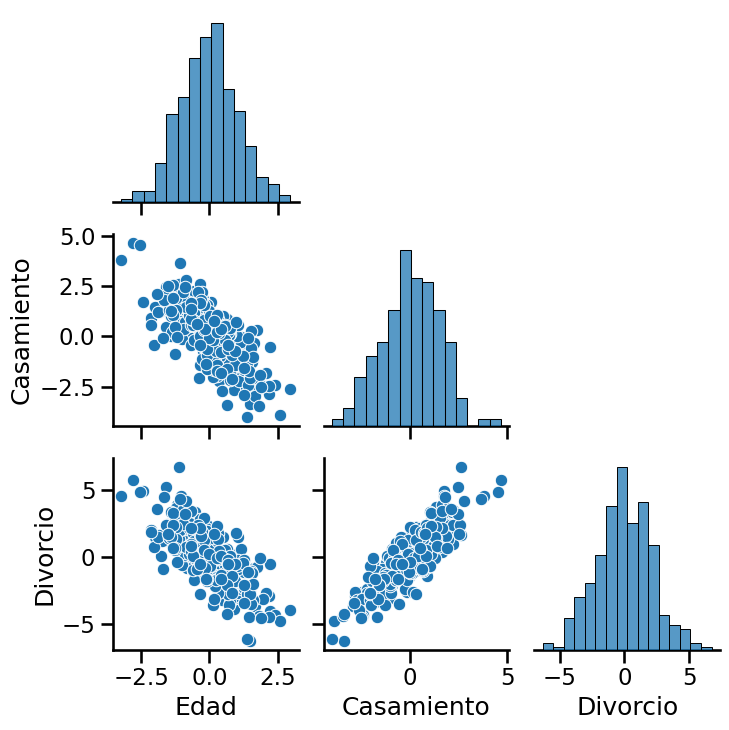

In [ ]:
# Semilla, por reproducibilidad
np.random.seed(123)

# Número de muestras
n = 300

# Generamos edad
edad = np.random.normal(size = n)

# Generamos tasa de casamientos y de divorcios
# En ese orden, dada la dependencia que estamos planteando del modelo real.
casamiento = np.random.normal(loc = -1*edad, size = n)

divorcio = np.random.normal(loc = 1*casamiento -0.5*edad, size = n)

# Pasamos los datos a un DataFrame (por simplicidad de manipulación)
data = pd.DataFrame({"Edad": edad, "Casamiento":casamiento, "Divorcio": divorcio})
data.head()
sns.pairplot(data, corner = True)

## Modelos aplicados

Planteamos la relación verdadera y 3 modelos posibles que se podrían plantear para resolver la pregunta de ¿qué asociación CAUSAL hay entre la tasa de casamiento y la tasa de divorcios? (el casamiento, CAUSA divorcios?

Vemos que hay dos caminos entre estas variables, la directa, y la moderada por la edad al moemnto de casarse.

Dag con Bifurcación - Modelo generador


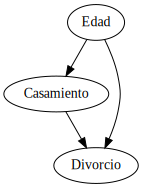

Modelo 1: Edad -> Divorcio


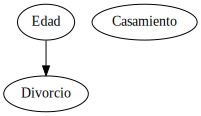

Modelo 2: Casamiento -> Divorcio


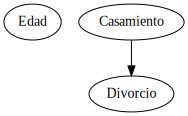

Modelo 3: Edad -> Divorcio, Casamiento -> Divorcio


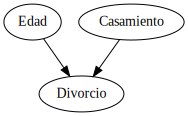

In [3]:
# Estos códigos son para visualizar los DAGs: gráficos aciclicos dirigidos

dot = graphviz.Digraph()  #nombramos el grafo
dot.node('E', 'Edad')     #agregamos los nodos, que son las variables aleatorias
dot.node('C', 'Casamiento')
dot.node('D', 'Divorcio')
dot.edges(['EC', 'ED', 'CD']) #agregamos los ejes entre las variables
print("Dag con Bifurcación - Modelo generador")
dot                           # visualizamos el DAG

dot1 = graphviz.Digraph()
dot1.node('E', 'Edad')
dot1.node('C', 'Casamiento')
dot1.node('D', 'Divorcio')
dot1.edges([ 'ED'])
print("Modelo 1: Edad -> Divorcio")
dot1

dot2 = graphviz.Digraph()
dot2.node('E', 'Edad')
dot2.node('C', 'Casamiento')
dot2.node('D', 'Divorcio')
dot2.edges(['CD'])
print("Modelo 2: Casamiento -> Divorcio")
dot2

dot3 = graphviz.Digraph()
dot3.node('E', 'Edad')
dot3.node('C', 'Casamiento')
dot3.node('D', 'Divorcio')
dot3.edges(['ED', 'CD'])
print("Modelo 3: Edad -> Divorcio, Casamiento -> Divorcio")
dot3

Instanciamos los modelos y realizamos inferencia en cada uno, sabiendo que como es una bifurcación, **debemos** controlar por la edad.

Para esto, primero instanciamos el modelo (with pm.Model() as nombre:), luego generamos las variables aleatorias con un nombre entre comillas, y los parámetros de cada caso. Acá, "divor" va a ser la verosimilitud de la tasa de divorcio, dadas las otras variables aleatorias. Ver cóomo allí informamos los datos observados.
En idata_modelo se guardan las trazas de los espacios de parámetros, corridas con "pm.sample()".

In [ ]:
with pm.Model() as edad_divorcio:
    a = pm.Normal("a", mu = 0, sigma = 0.2)
    bE = pm.Normal("bE", 0, 0.5)

    sigma = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", a + bE * data["Edad"].values)

    divor = pm.Normal("divorcio", mu=mu, sigma=sigma, observed=data["Divorcio"].values)
    idata_edad_divorcio = pm.sample()


with pm.Model() as casamiento_divorcio :
    a = pm.Normal("a", 0, 0.2)
    bC = pm.Normal("bC", 0, 0.5)

    sigma = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", a + bC * data["Casamiento"].values)

    divor = pm.Normal("divorcio", mu=mu, sigma=sigma, observed=data["Divorcio"].values)
    idata_casamiento_divorcio = pm.sample()


with pm.Model() as edad_casamiento_divorcio:
    a = pm.Normal("a", 0, 0.2)
    bE = pm.Normal("bE", 0, 0.5)
    bC = pm.Normal("bC", 0, 0.5)

    sigma = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", a + bC * data["Casamiento"].values + bE * data["Edad"].values)

    divor = pm.Normal("divorcio", mu=mu, sigma=sigma, observed=data["Divorcio"].values)
    idata_edad_casamiento_divorcio = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bE, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bC, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bE, bC, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Abajo, graficamos, dentro del intervalo de máxima intensidad del 94%, los valores medios y errores de las pendientes.
Vemos cómo el modelo completo, que controla por la edad, estima valores de los parámetros más cercanos a los valores reales, marcados con líneas verticales puntuales.

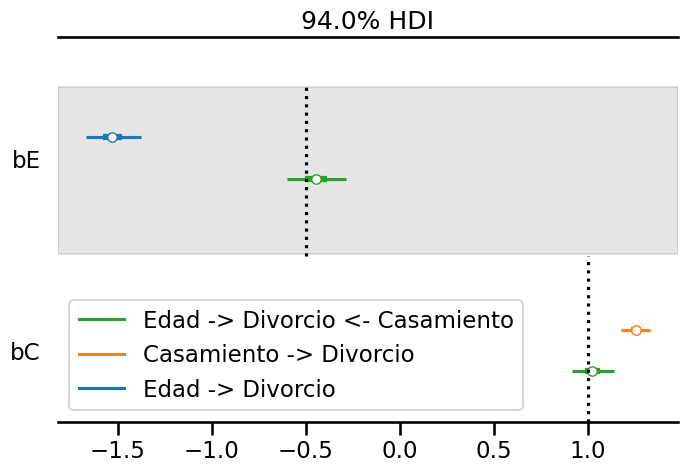

In [ ]:
axes = az.plot_forest([idata_edad_divorcio,idata_casamiento_divorcio,idata_edad_casamiento_divorcio,],
               model_names=["Edad -> Divorcio", "Casamiento -> Divorcio", "Edad -> Divorcio <- Casamiento"],
               var_names=["bE", "bC"],
    combined=True,figsize = (8,5))
axis = axes[0]
ylocs = axis.yaxis.get_majorticklocs()[::-1]

_ = axis.axvline(-0.5, ymin = 0.43, ymax = 0.87, color="black", linestyle="dotted")
_ = axis.axvline(1, ymin = 0, ymax = 0.431, color="black", linestyle="dotted")


Vemos cómo el modelo de Casamiento -> Divorcio nos da una medida sesgada de la asociación entre estas variables, al no considerar la variable confundidora de la edad.

En este caso podemos controlar por la variable ya que es una observada en el estudio.

¿Qué pasa si el estudio observacional no puede obtener esta información?
